# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

#url
#weat_url = f"https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [44]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [45]:
weat_url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial"
url_wkey= weat_url + "&appid=" + weather_api_key

In [46]:
citi_lst = []

print("Begin API Call to OpenWeather Database ")
print("--------------------------------------")

for i,city in enumerate(cities):
    
    # API can only handle 50 requests a minute...
    
    if (i%50 == 0) & (i >= 50):
        print('Maximum API call limit reached, waiting 60 seconds')
        time.sleep(60)
        
    
    city_url = url_wkey + '&q=' + city.replace(" ","+")
    city_api_call = requests.get(city_url).json()
   

    
    
    try:
        
        city_country = city_api_call['sys']['country']
        city_lat = city_api_call['coord']['lat']
        city_lng = city_api_call['coord']['lon']
        city_max_temp = city_api_call['main']['temp_max']
        city_humidity = city_api_call['main']['humidity']
        city_clouds = city_api_call['clouds']['all']
        city_wind = city_api_call['wind']['speed']
        city_weather = city_api_call['weather'][0]['description']
        
        
        
        citi_lst.append({ "City": city.title(),
                          "Country": city_country,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Current Description": city_weather})
        
        print(f"Gathered {city}'s infromation,{i}")
        
    except:
        
        print(f"Could not find {city}'s information,{i}")
    
    
print('All Done!')
        

Begin API Call to OpenWeather Database 
--------------------------------------
Gathered hermanus's infromation,0
Gathered loa janan's infromation,1
Gathered yellowknife's infromation,2
Gathered gilgit's infromation,3
Gathered esperance's infromation,4
Gathered norman wells's infromation,5
Could not find matameye's information,6
Gathered cape town's infromation,7
Gathered tevaitoa's infromation,8
Gathered tasiilaq's infromation,9
Gathered lebedinyy's infromation,10
Gathered hithadhoo's infromation,11
Gathered rincon's infromation,12
Gathered izvestkovyy's infromation,13
Gathered albany's infromation,14
Gathered poya's infromation,15
Gathered qaanaaq's infromation,16
Gathered avarua's infromation,17
Gathered east london's infromation,18
Gathered bawku's infromation,19
Gathered codrington's infromation,20
Could not find guajara-mirim's information,21
Gathered bluff's infromation,22
Gathered biak's infromation,23
Gathered upernavik's infromation,24
Gathered margate's infromation,25
Could n

In [47]:
len(citi_lst)

581

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [48]:
wthr_data_df=pd.DataFrame(citi_lst)
wthr_data_df.head(10)

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
0,Hermanus,ZA,-34.4187,19.2345,70.81,56,54,2.57,broken clouds
1,Loa Janan,ID,-0.5830,117.0950,75.70,96,97,0.16,overcast clouds
2,Yellowknife,CA,62.4560,-114.3525,36.12,51,20,10.36,few clouds
3,Gilgit,PK,35.9221,74.3087,75.70,41,96,5.21,overcast clouds
4,Esperance,AU,-33.8667,121.9000,63.10,64,100,14.38,overcast clouds
5,Norman Wells,CA,65.2820,-126.8329,48.24,43,20,12.66,few clouds
6,Cape Town,ZA,-33.9258,18.4232,74.10,53,64,1.99,broken clouds
7,Tevaitoa,PF,-16.7833,-151.5000,80.37,75,98,8.25,light rain
8,Tasiilaq,GL,65.6145,-37.6368,28.54,70,100,2.84,overcast clouds
9,Lebedinyy,RU,58.5167,125.5167,14.52,94,94,4.07,overcast clouds


In [53]:
wthr_data_df.to_csv('WeatherPy_Database.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [54]:
wthr_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000
mean,21.245431,16.788846,62.741050,68.418244,60.430293,8.231549
std,32.677408,89.376496,20.919715,21.787823,37.793642,5.578630
min,-54.800000,-175.200000,0.680000,6.000000,0.000000,0.000000
25%,-5.198900,-63.057800,50.050000,56.000000,23.000000,4.230000
50%,26.184200,21.986300,66.020000,74.000000,74.000000,6.910000
75%,48.447500,92.750000,79.830000,84.000000,99.000000,10.380000
max,78.218600,179.316700,108.010000,100.000000,100.000000,31.070000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

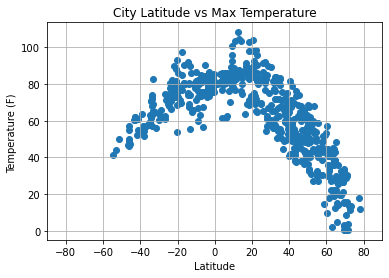

In [62]:
plt.scatter(wthr_data_df["Lat"],wthr_data_df["Max Temp"])
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Temperature (F) ")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)
plt.savefig("Latitude_vs_MaxTemps.png")
plt.show()

## Latitude vs. Humidity Plot

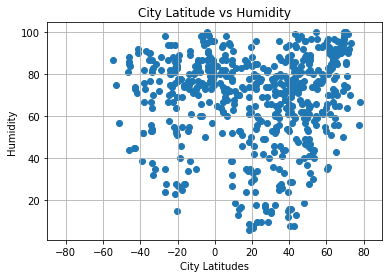

In [63]:
plt.scatter(wthr_data_df["Lat"],wthr_data_df["Humidity"])
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("City Latitudes")
plt.grid(True)
plt.xlim(-90,90)
plt.savefig("Latitude_vs_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

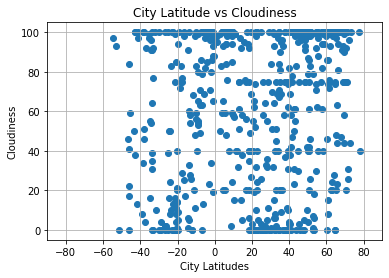

In [66]:
plt.scatter(wthr_data_df["Lat"],wthr_data_df["Cloudiness"])
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("City Latitudes")
plt.grid(True)
plt.xlim(-90,90)
plt.savefig("Latitude_vs_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

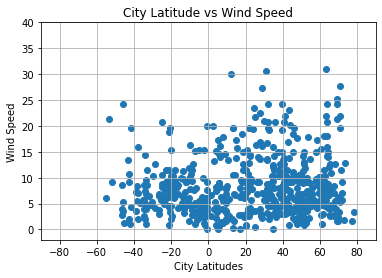

In [67]:
plt.scatter(wthr_data_df["Lat"],wthr_data_df["Wind Speed"])
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("City Latitudes")
plt.grid(True)
plt.xlim(-90,90)
plt.ylim(-2,40)
plt.savefig("Latitude_vs_Wind_Speed.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


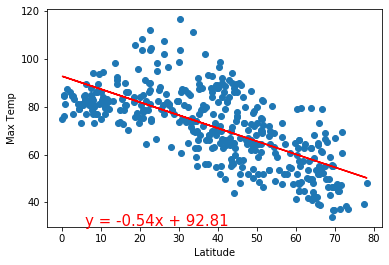

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


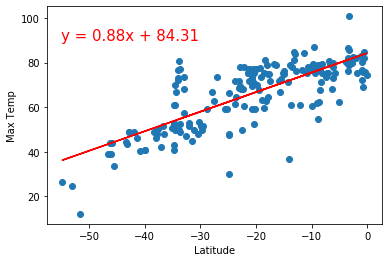

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


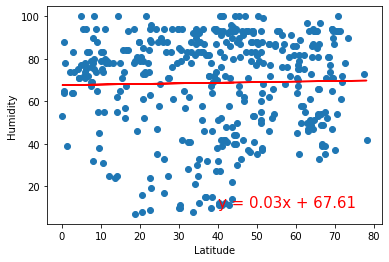

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


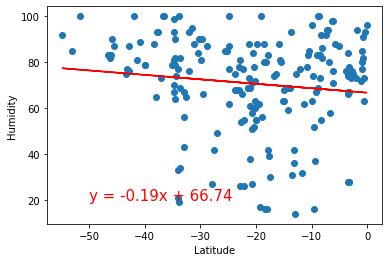

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


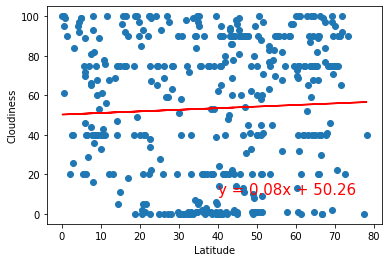

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


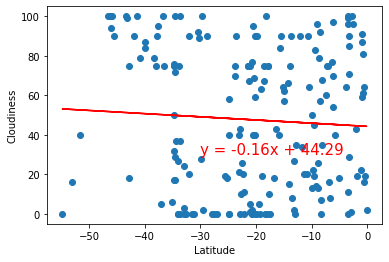

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


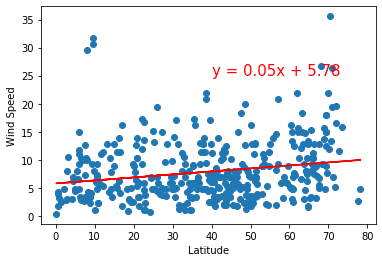

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


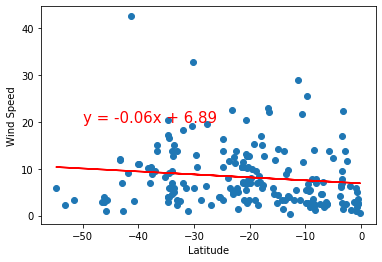